In [22]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import csv

In [23]:
#loading data
file_1="/workspaces/State-of-Health-Estimation-Battery/Dataset/B0005_dis_dataset.csv"
dataset=pd.read_csv(file_1)


In [24]:
Soh=(dataset["capacity"]*100)//2
soh=[ int(Soh[i]) for i in range(len(Soh))]

In [25]:
# normalising data
dataset=dataset[["cycle","capacity","voltage_measured","current_measured","temperature_measured","current_load","voltage_load"]]
df_norm = (dataset-dataset.min())/(dataset.max()-dataset.min())
att=["cycle","temperature_measured","capacity","current_load"]
df_norm["Soh"]=soh

In [26]:
X = df_norm[att]
Y = df_norm[["Soh"]]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0) 

In [28]:
#sorting data wrt to index
X_test = X_test.sort_index(axis=0)
X_train= X_train.sort_index(axis=0)
y_train= y_train.sort_index(axis=0)
y_test = y_test.sort_index(axis=0)

In [29]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test[att])

In [30]:
def graph_plot(a,model):
    plt.scatter(X_test["cycle"],y_test,color='red',label='actual',s=10)
    plt.scatter(X_test["cycle"],a,color='cyan',label='dis_tree'+model,s=1)
    plt.xlabel("cycle")
    plt.ylabel("SOH")
    rmse="Rmse = "+str(np.sqrt(metrics.mean_squared_error(y_test, a)))
    plt.figtext(0.33, -0.03, rmse, fontsize=10)
    plt.legend(loc="upper right")
    plt.suptitle("Decision Tree")
    plt.show()
    print(np.sqrt(metrics.mean_squared_error(y_test, a)))

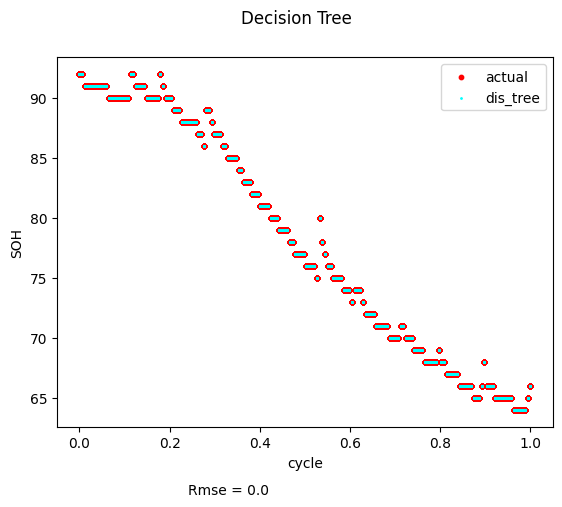

0.0


In [31]:
graph_plot(y_pred,"")